In [37]:
import pandas as pd

In [38]:
dados = pd.read_csv("processed-data/wheels.csv")

In [39]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [40]:
x=dados.drop("inadimplente", axis=1)
y=dados["inadimplente"]

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
modelo=DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [44]:
print(f"Acurácia: {modelo.score(x,y)*100:.2f}%")

Acurácia: 100.00%


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_validacao, y_train, y_validacao = train_test_split(x, y, stratify=y, random_state=5)

In [51]:
modelo=DecisionTreeClassifier()
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 100.00%
Acurácia de validação: 84.84%


In [54]:
modelo=DecisionTreeClassifier(max_depth=3)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.27%
Acurácia de validação: 91.27%


In [55]:
modelo=DecisionTreeClassifier(max_depth=5)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.34%
Acurácia de validação: 91.24%


In [57]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 92.06%
Acurácia de validação: 90.57%


In [60]:
from sklearn.metrics import confusion_matrix

In [63]:
y_previsto = modelo.predict(x_validacao)
matriz_confusao = confusion_matrix(y_validacao, y_previsto)
print(matriz_confusao)

[[10357   122]
 [  961    41]]


In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

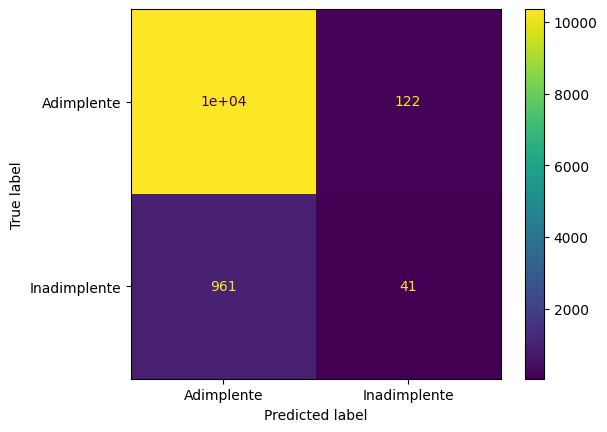

In [75]:
visualizador = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels="Adimplente Inadimplente".split())
visualizador.plot()